In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("abalone.data")

df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["M"] = le.fit_transform(df['M'])

df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
y = df['0.15']
X = df.drop('0.15', axis=1)
X = X.drop('15', axis=1)

y

0       0.0700
1       0.2100
2       0.1550
3       0.0550
4       0.1200
         ...  
4171    0.2490
4172    0.2605
4173    0.3080
4174    0.2960
4175    0.4950
Name: 0.15, Length: 4176, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape

(3340, 7)

In [5]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(7,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(Adam(lr=0.001),loss = 'mean_squared_error', metrics = ['mse'])

model.summary()

2023-05-18 11:30:39.596646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 12)                252       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


2023-05-18 11:30:42.001592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=3, validation_data= (X_test, y_test))
y_pred = model.predict(X_test)

Epoch 1/100
1114/1114 [==============================] - 1s 654us/step - loss: 8.7670e-04 - mse: 8.7670e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/100
1114/1114 [==============================] - 1s 643us/step - loss: 8.3522e-04 - mse: 8.3522e-04 - val_loss: 9.1727e-04 - val_mse: 9.1727e-04
Epoch 3/100
1114/1114 [==============================] - 1s 640us/step - loss: 8.4725e-04 - mse: 8.4725e-04 - val_loss: 9.5937e-04 - val_mse: 9.5937e-04
Epoch 4/100
1114/1114 [==============================] - 1s 633us/step - loss: 8.5266e-04 - mse: 8.5266e-04 - val_loss: 9.0207e-04 - val_mse: 9.0207e-04
Epoch 5/100
1114/1114 [==============================] - 1s 628us/step - loss: 8.6826e-04 - mse: 8.6826e-04 - val_loss: 9.1786e-04 - val_mse: 9.1786e-04
Epoch 6/100
1114/1114 [==============================] - 1s 633us/step - loss: 8.4086e-04 - mse: 8.4086e-04 - val_loss: 9.0895e-04 - val_mse: 9.0895e-04
Epoch 7/100
1114/1114 [==============================] - 1s 635us/step - loss: 8.2893e-04 

1114/1114 [==============================] - 1s 657us/step - loss: 8.2605e-04 - mse: 8.2605e-04 - val_loss: 8.9004e-04 - val_mse: 8.9004e-04
Epoch 56/100
1114/1114 [==============================] - 1s 633us/step - loss: 8.1719e-04 - mse: 8.1719e-04 - val_loss: 9.9340e-04 - val_mse: 9.9340e-04
Epoch 57/100
1114/1114 [==============================] - 1s 634us/step - loss: 8.4168e-04 - mse: 8.4168e-04 - val_loss: 9.1648e-04 - val_mse: 9.1648e-04
Epoch 58/100
1114/1114 [==============================] - 1s 632us/step - loss: 8.2047e-04 - mse: 8.2047e-04 - val_loss: 9.1355e-04 - val_mse: 9.1355e-04
Epoch 59/100
1114/1114 [==============================] - 1s 633us/step - loss: 8.3298e-04 - mse: 8.3298e-04 - val_loss: 9.6611e-04 - val_mse: 9.6611e-04
Epoch 60/100
1114/1114 [==============================] - 1s 635us/step - loss: 8.5325e-04 - mse: 8.5325e-04 - val_loss: 8.9926e-04 - val_mse: 8.9926e-04
Epoch 61/100
1114/1114 [==============================] - 1s 636us/step - loss: 8.2439e-0

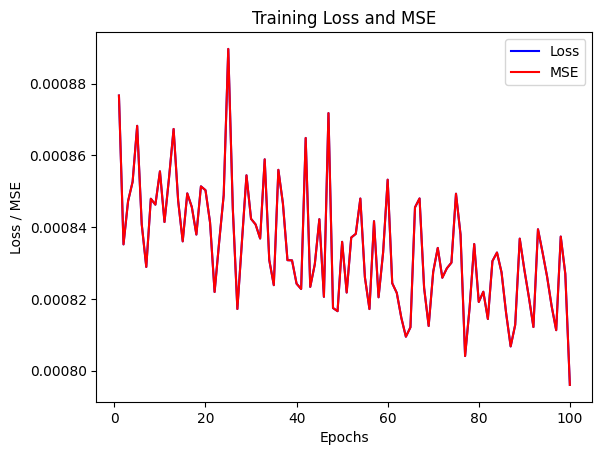

In [10]:
import matplotlib.pyplot as plt

# 손실(loss)과 평균 제곱 오차(MSE) 추출
loss = model_history.history['loss']
mse = model_history.history['mse']

# 그래프 그리기
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Loss')
plt.plot(epochs, mse, 'r', label='MSE')
plt.title('Training Loss and MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss / MSE')
plt.legend()
plt.show()

In [14]:
print(sum(mse)/len(mse))

0.0008344611129723489
